# **VALORANT PLAYER'S STATS ANALYSIS**


## Gaming Understanding

### Valorant is a free-to-play first-person hero shooter developed and published by Riot Games. It was released for Microsoft Windows in June 2020. The game features a variety of characters, called Agents, each with unique abilities. Players must work together to complete objectives such as planting or defusing a bomb, or eliminating all enemy players.


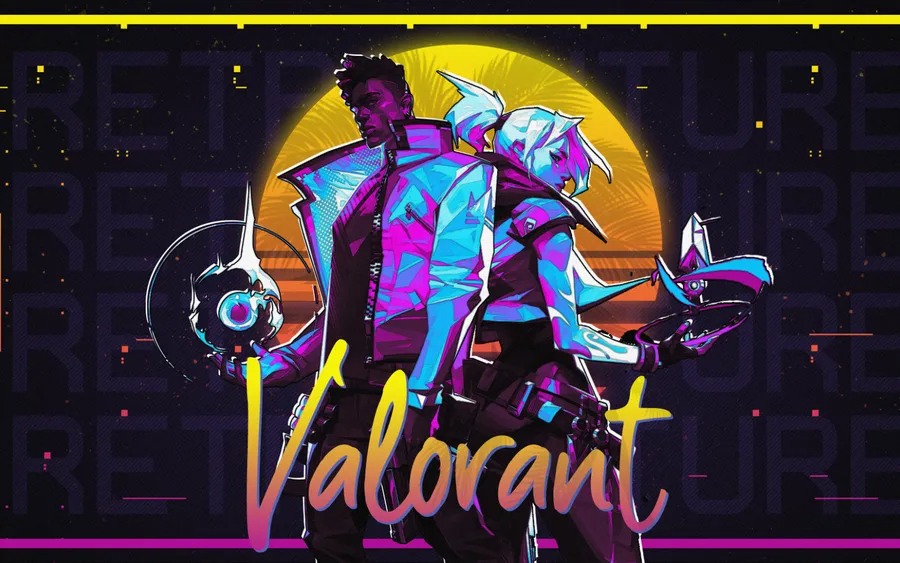

#### In this project, we focused to answer the following questions:
@@@@@@@@@@@@@@@@@@@@@@@@@@@@ Arrangment is left @@@@@@@@@@@@@@@@@@@@@@@@@
1. What are the 10 most popular agents in Valorant ? 

2. Linear Regreesion for both data set  ( for data set 1 left i.e. palyers statistics!!!!!!!!!!!!!!!!)

3. Decision tree for both data set 

4. SCOREBOARD STATS VS RABK RATING GAIN FOR DATASET 2 I.E HEATMAP LEFTTTTTT


In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #used for ploting graph
plt.style.use('bmh') #used for ploting graph
plt.show() #display different types for chart and graphs
# used for data classification using decision tree 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
#import seaborn as sa # type: ignore


### **Fetching main file player statistics**

In [37]:
df = pd.read_csv("Player Statistics.csv")
df.head()

Player   Age             Team     Current Team  Birth Date  Maps  Kills  \
0   zekken  19.0        Sentinels        Sentinels  2005-03-19    20    381   
1   ZmjjKK  20.0    EDward Gaming    EDward Gaming  2004-03-03     8    135   
2  N4RRATE  21.0     Karmine Corp     Karmine Corp  2002-11-25     7    132   
3  MiniBoo  19.0    Team Heretics    Team Heretics  2005-07-11     6    114   
4   Autumn  23.0  FunPlus Phoenix  FunPlus Phoenix  2001-11-09     4     68   

   Deaths  Assists  KillperDeath   KDA  ACS/Map  K/Map  D/Map  A/Map  
0     314       90          1.21  1.50      259   19.0   15.7    4.5  
1     125       39          1.08  1.39      252   16.8   15.6    4.8  
2     104       65          1.26  1.89      245   18.8   14.8    9.2  
3      92       37          1.23  1.64      245   19.0   15.3    6.1  
4      71       16          0.95  1.18      231   17.0   17.7    4.0

Exploratory Data Analysis 

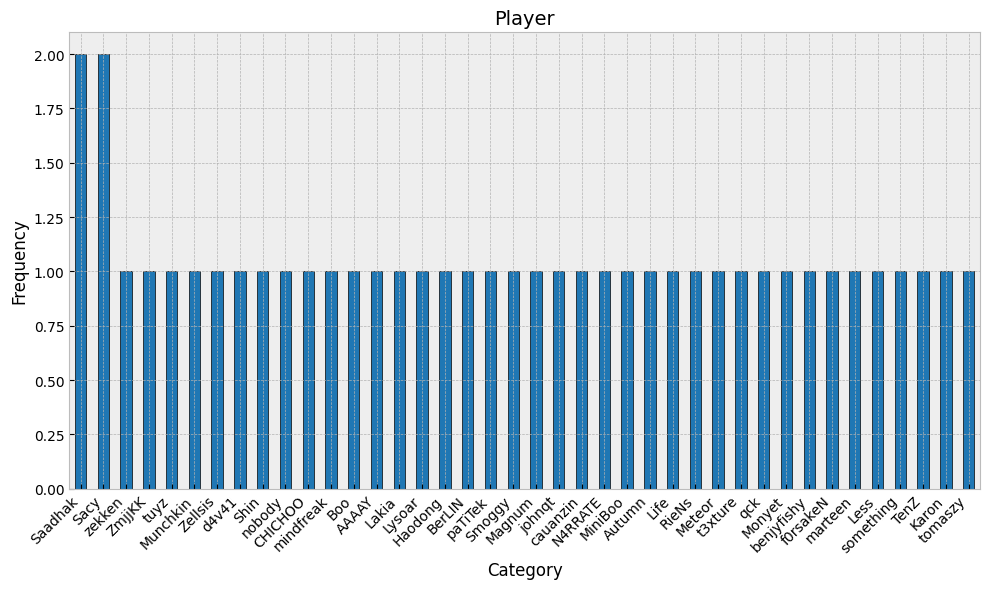

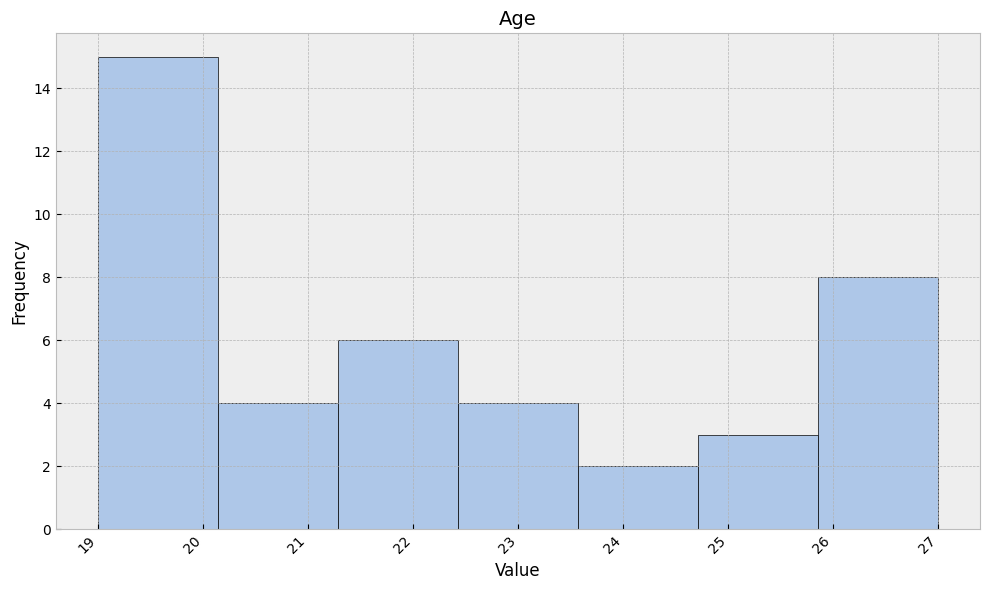

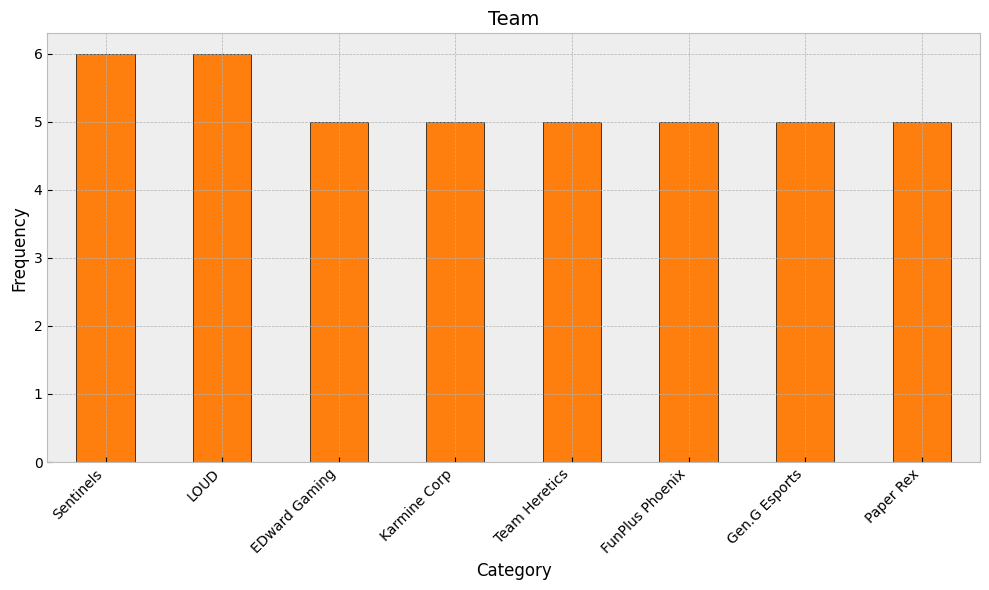

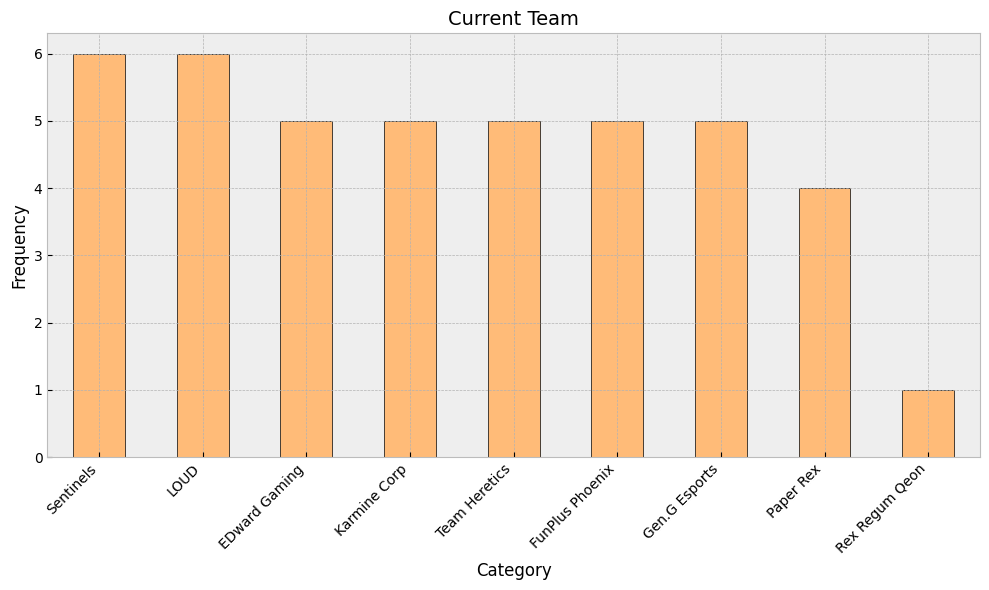

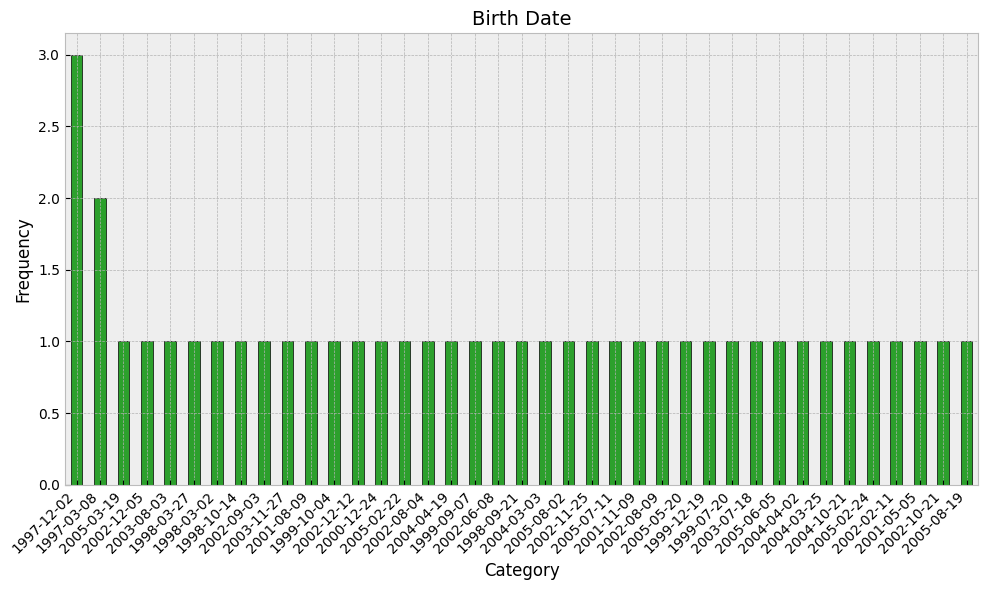

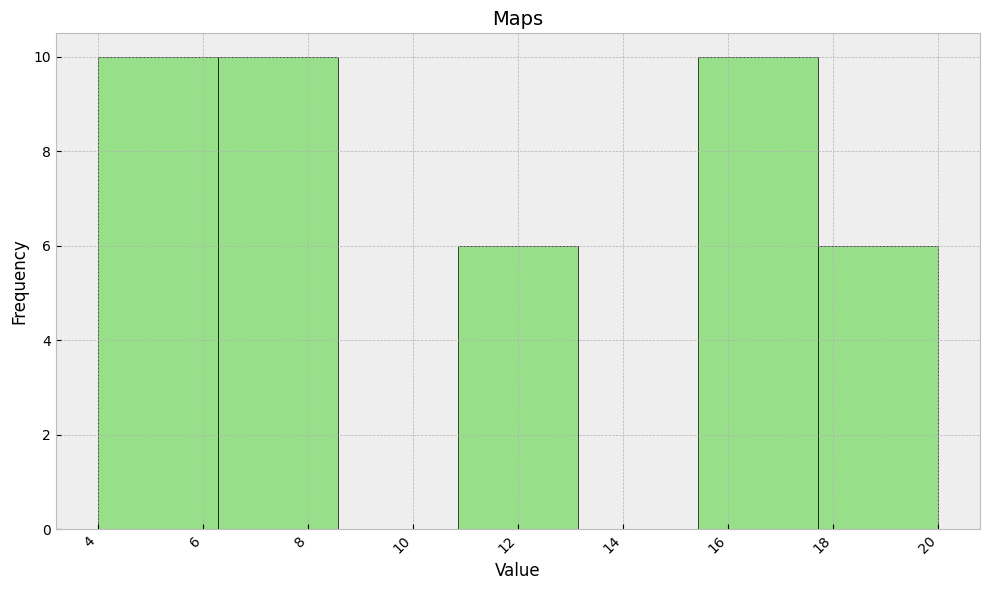

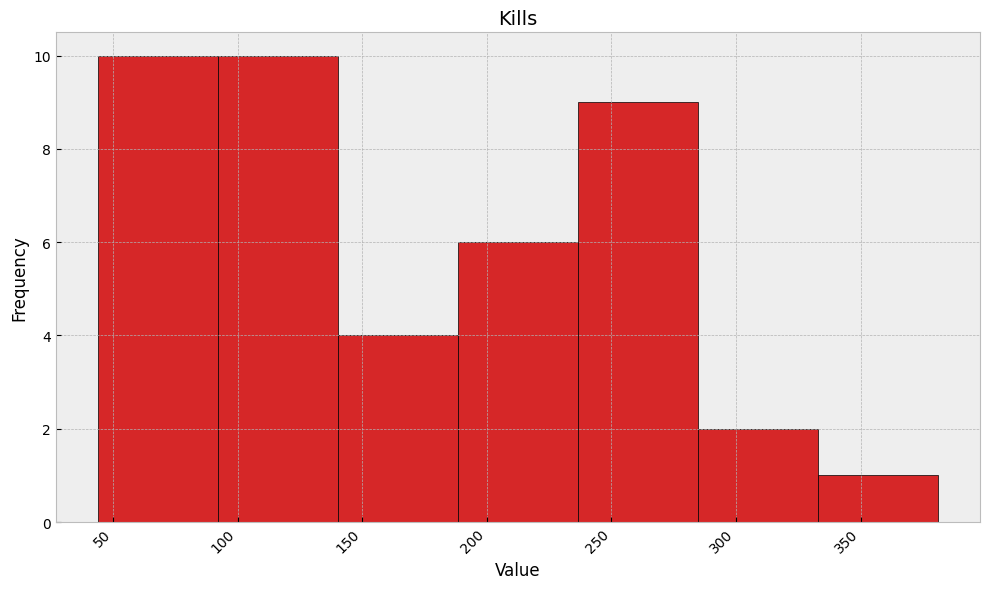

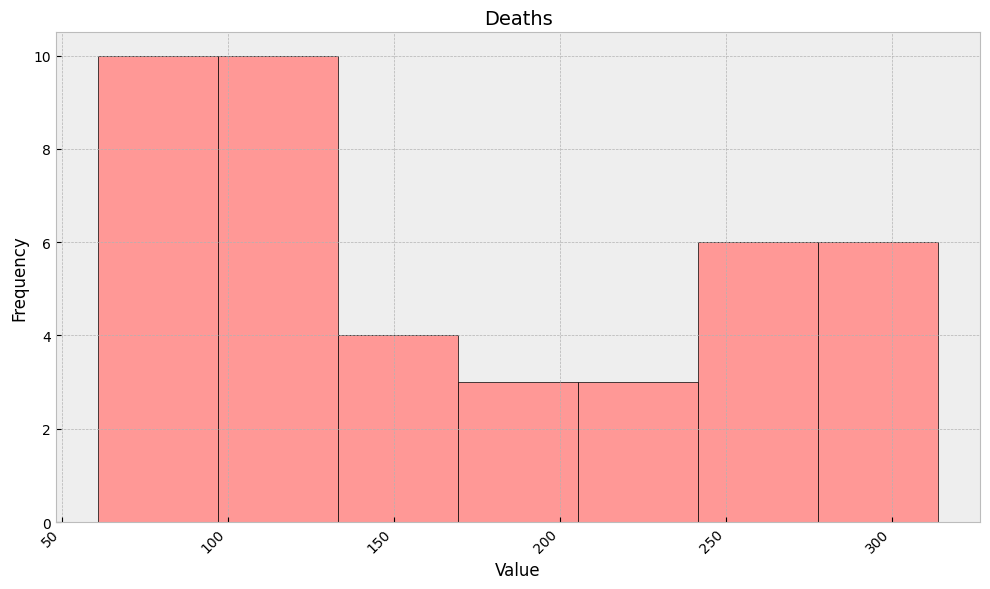

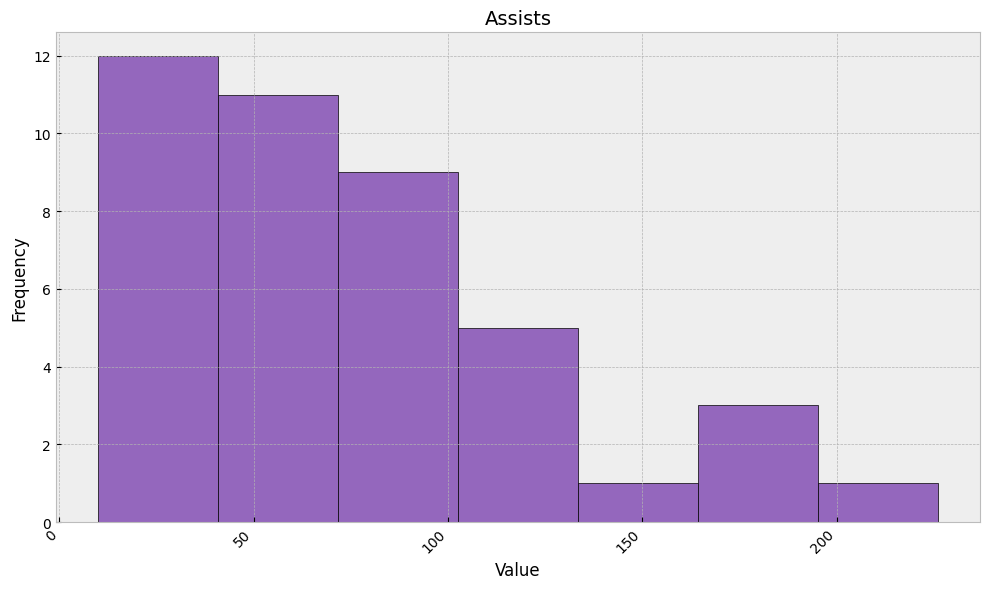

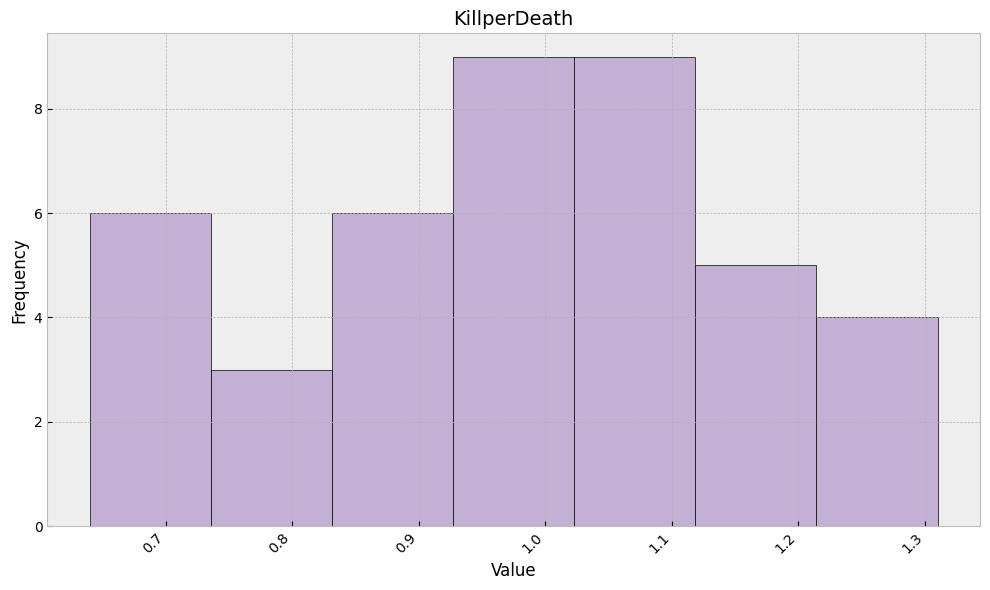

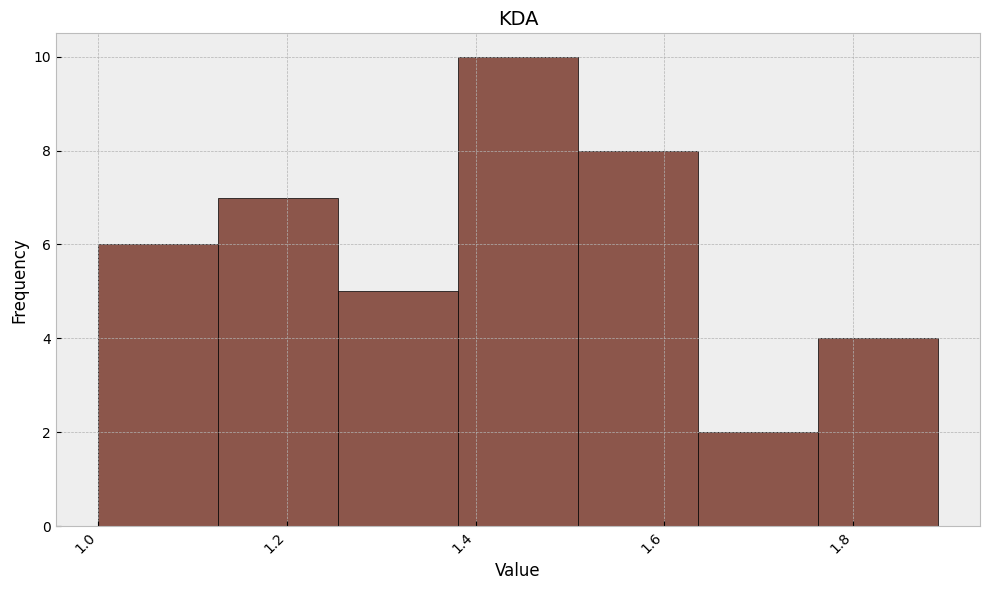

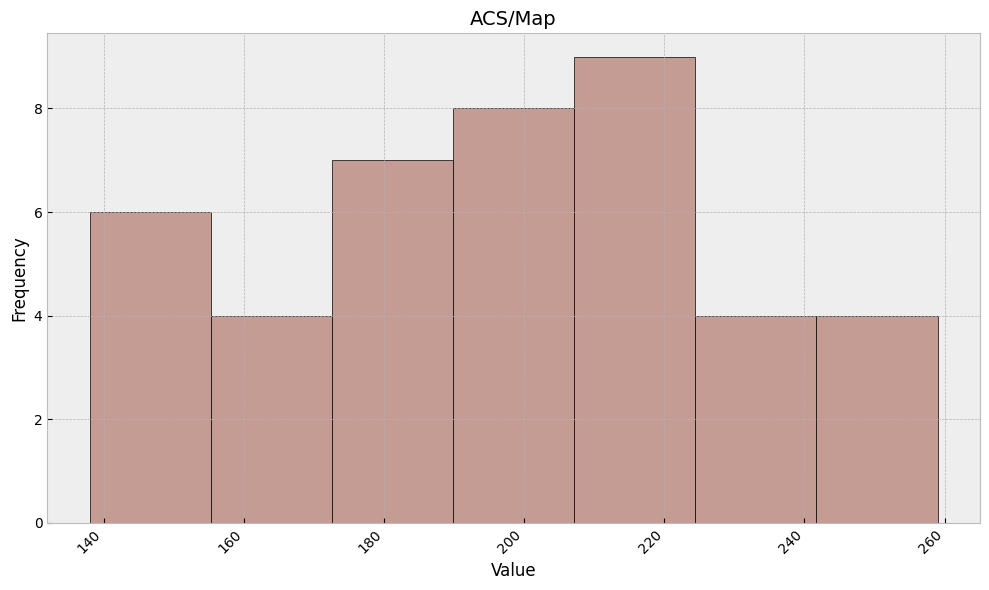

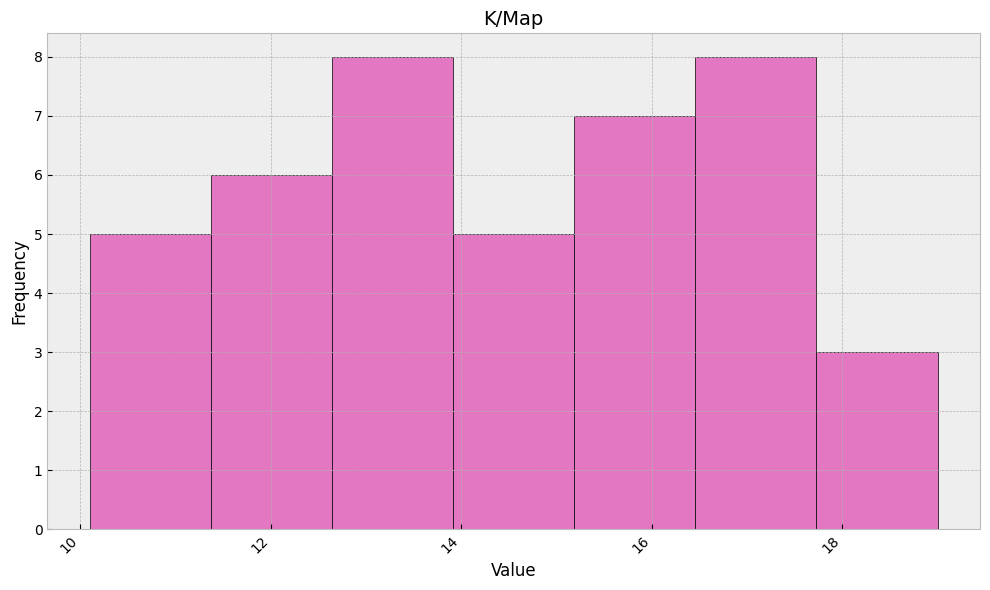

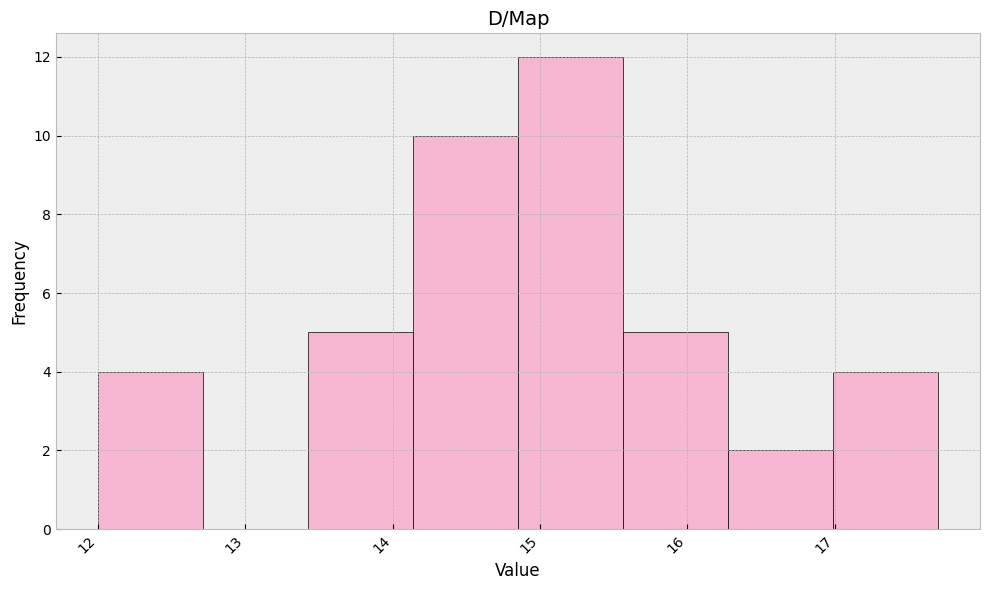

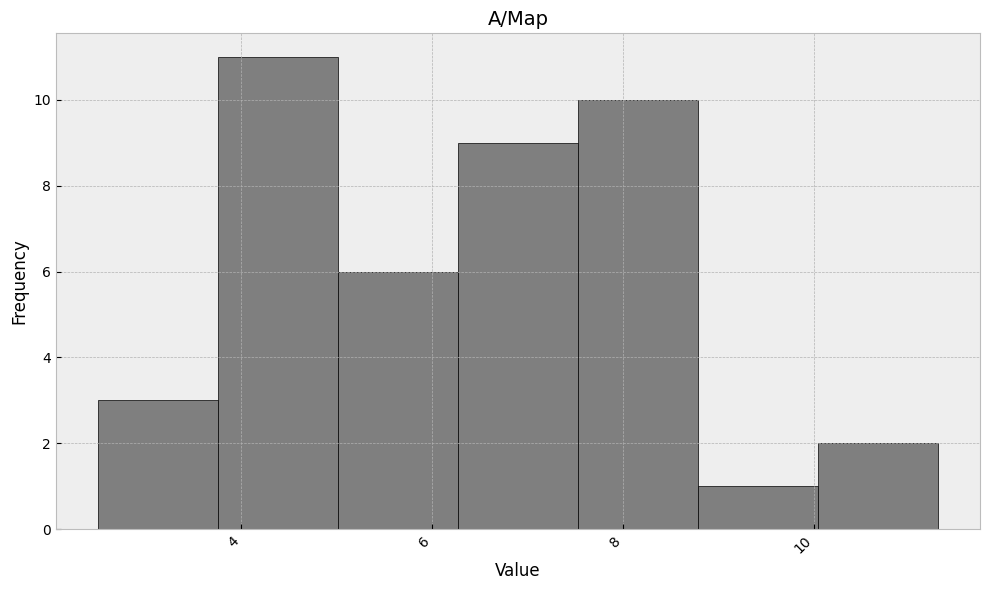

In [3]:
# Assign predictor variables and target variable
train_data = df[df.columns[1:]]
target_data = df[df.columns[0]]

# Color palette for histograms (Updated for Matplotlib 3.7+)
colors = plt.colormaps['tab20'].colors

# Obtain a histogram of each data column for Player's stats
for i in range(len(df.columns)):
    currData = df[df.columns[i]]
    
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(currData):
        # Handle missing values for numeric data (filling with mean)
        currData = currData.fillna(currData.mean())
        
        # Create a new figure for each histogram with a larger size
        plt.figure(figsize=(10, 6))  # Adjust the size of the figure
        
        # Plot the histogram with different colors
        plt.hist(currData, bins='auto', edgecolor='black', color=colors[i % len(colors)])
        
        # Add labels and title
        plt.title(df.columns[i], fontsize=14)
        plt.xlabel('Value', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')
        
        # Prevent overlapping and ensure everything fits
        plt.tight_layout()
        
        # Display the plot
        plt.show()
        
        # Close all open figures to prevent overlap
        plt.close("all")
    
    # If the column is not numeric (categorical data), handle it differently
    else:
        # Handle missing values for non-numeric data (filling with mode)
        currData = currData.fillna(currData.mode()[0])
        
        # You could visualize the frequency of categories here, if needed:
        # Create a new figure for the categorical data histogram
        plt.figure(figsize=(10, 6))  # Adjust the size of the figure
        
        # Plot a bar chart for categorical data
        currData.value_counts().plot(kind='bar', color=colors[i % len(colors)], edgecolor='black')
        
        # Add labels and title
        plt.title(df.columns[i], fontsize=14)
        plt.xlabel('Category', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')
        
        # Prevent overlapping and ensure everything fits
        plt.tight_layout()
        
        # Display the plot
        plt.show()
        
        # Close all open figures to prevent overlap
        plt.close("all")


### **Fetching file map statistics** 


Map  Total  Round 1  Round 2  Round 3  Playoffs
0  Ascent      6        1        0        1         4
1    Bind      7        2        1        1         3
2  Breeze      6        1        2        1         2
3  Icebox      7        2        2        1         2
4   Lotus      8        2        2        1         3

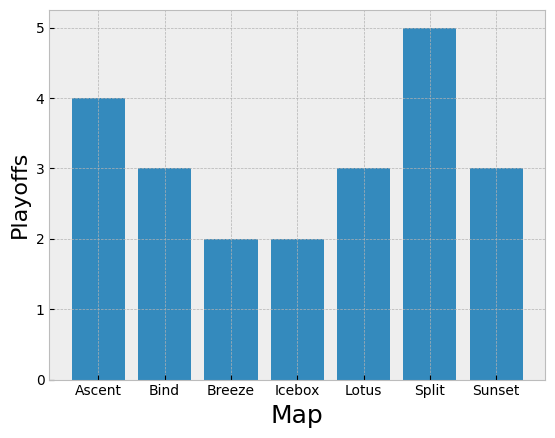

In [4]:
df1 = pd.read_csv('Map Statistics.csv')
#map na value 
x=df1['Map']
y=df1['Playoffs']
#Bar Graph
plt.xlabel('Map',fontsize=18)
plt.ylabel('Playoffs', fontsize=16)
plt.bar(x,y)
df1.head()

### **Fetching file map banned**

Map  Total  Round 1  Round 2  Round 3  Playoffs
0       -      2        0        0        0         2
1  Ascent     10        3        4        1         2
2    Bind      9        2        3        1         3
3  Breeze     10        3        2        1         4
4  Icebox      9        2        2        1         4

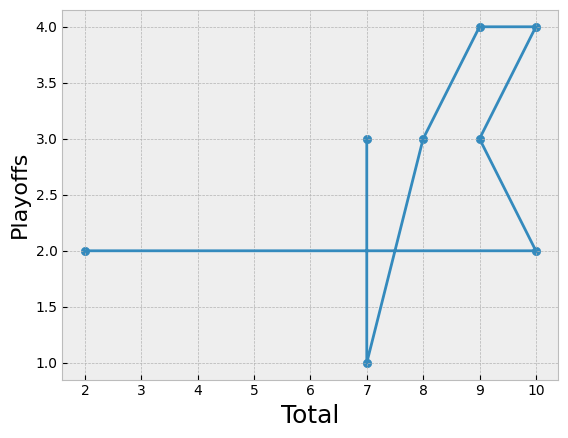

In [5]:
df2 = pd.read_csv('Maps Banned.csv')
#line Graph
x=df2['Total']
y=df2['Playoffs']
plt.xlabel('Total',fontsize=18)
plt.ylabel('Playoffs',fontsize=16)
plt.scatter(x,y)
plt.plot(x,y)
df2.head()


### **Fetching file side statistics**

In [6]:
df3=pd.read_csv('Side Statistics.csv')
df3.head()#Viewing the data record 

Map  Atk Wins Count  Atk Wins Percentage  Def Wins Count  \
0  Ascent              54                 50.0              54   
1    Bind              47                 49.5              48   
2  Breeze              56                 55.4              45   
3  Icebox              68                 54.0              58   
4   Lotus              98                 54.7              81   

   Def Wins Percentage  
0                 50.0  
1                 50.5  
2                 44.6  
3                 46.0  
4                 45.3

### **Basic steps / Basic Operations**

**1. Show all columns in dataset**

In [7]:
df.columns 

Index(['Player', 'Age', 'Team', 'Current Team', 'Birth Date', 'Maps', 'Kills',
       'Deaths', 'Assists', 'KillperDeath', 'KDA', 'ACS/Map', 'K/Map', 'D/Map',
       'A/Map'],
      dtype='object')

**2. Give info of player statistics**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        42 non-null     object 
 1   Age           42 non-null     float64
 2   Team          42 non-null     object 
 3   Current Team  42 non-null     object 
 4   Birth Date    42 non-null     object 
 5   Maps          42 non-null     int64  
 6   Kills         42 non-null     int64  
 7   Deaths        42 non-null     int64  
 8   Assists       42 non-null     int64  
 9   KillperDeath  42 non-null     float64
 10  KDA           42 non-null     float64
 11  ACS/Map       42 non-null     int64  
 12  K/Map         42 non-null     float64
 13  D/Map         42 non-null     float64
 14  A/Map         42 non-null     float64
dtypes: float64(6), int64(5), object(4)
memory usage: 5.1+ KB


**3. Give info of Map Satistics**

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Map       7 non-null      object
 1   Total     7 non-null      int64 
 2   Round 1   7 non-null      int64 
 3   Round 2   7 non-null      int64 
 4   Round 3   7 non-null      int64 
 5   Playoffs  7 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 468.0+ bytes


**4. Give info of Map banned**

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Map       8 non-null      object
 1   Total     8 non-null      int64 
 2   Round 1   8 non-null      int64 
 3   Round 2   8 non-null      int64 
 4   Round 3   8 non-null      int64 
 5   Playoffs  8 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 516.0+ bytes


**5. Give info of Side statistics**

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Map                  7 non-null      object 
 1   Atk Wins Count       7 non-null      int64  
 2   Atk Wins Percentage  7 non-null      float64
 3   Def Wins Count       7 non-null      int64  
 4   Def Wins Percentage  7 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 412.0+ bytes


**6. No. of duplicate dataitem in Player statics:**

In [12]:
df.duplicated().sum()

0

**7.Performing decidion tree operation on the following target column :**

In [13]:
#gives no. of rows & no. of columns 
df.shape

(42, 15)

**Checking the null values in the Player's statistic** 

In [14]:
df[df.isnull().any(axis=1)].head()
#no need of data cleaning as redundant data not found


Empty DataFrame
Columns: [Player, Age, Team, Current Team, Birth Date, Maps, Kills, Deaths, Assists, KillperDeath, KDA, ACS/Map, K/Map, D/Map, A/Map]
Index: []

In [15]:
#creating new coloum as y and coping data from df.player stats
y = df[['Assists']].copy()
y.head()

Assists
0       90
1       39
2       65
3       37
4       16

In [16]:
x = df[['Deaths']].copy()
x.columns

Index(['Deaths'], dtype='object')

# **What are the 10 most popular agents in Valorant ?** 

In [17]:
#1st Question .
#Player's Statistics .
# Sort the dataframe by Pick Rate in descending order
df_sorted = df.sort_values(by="Kills", ascending=False)

# Print the top 10 most popular agents
print(df_sorted.head(10))

       Player   Age           Team    Current Team  Birth Date  Maps  Kills  \
0      zekken  19.0      Sentinels       Sentinels  2005-03-19    20    381   
16       TenZ  23.0      Sentinels       Sentinels  2001-05-05    20    314   
19     johnqt  26.0      Sentinels       Sentinels  1998-09-21    20    293   
15  something  22.0      Paper Rex       Paper Rex  2002-02-11    17    274   
12   f0rsakeN  20.0      Paper Rex       Paper Rex  2004-03-25    17    273   
7      Meteor  24.0  Gen.G Esports   Gen.G Esports  1999-12-19    16    268   
8     t3xture  24.0  Gen.G Esports   Gen.G Esports  1999-07-20    16    264   
26    Zellsis  26.0      Sentinels       Sentinels  1998-03-02    20    263   
18     Monyet  19.0      Paper Rex  Rex Regum Qeon  2005-06-05    17    250   
30       Sacy  26.0      Sentinels       Sentinels  1997-12-02    20    249   

    Deaths  Assists  KillperDeath   KDA  ACS/Map  K/Map  D/Map  A/Map  
0      314       90          1.21  1.50      259   19.0   

# **LINEAR REFRESSION ON BOTH DATASET**
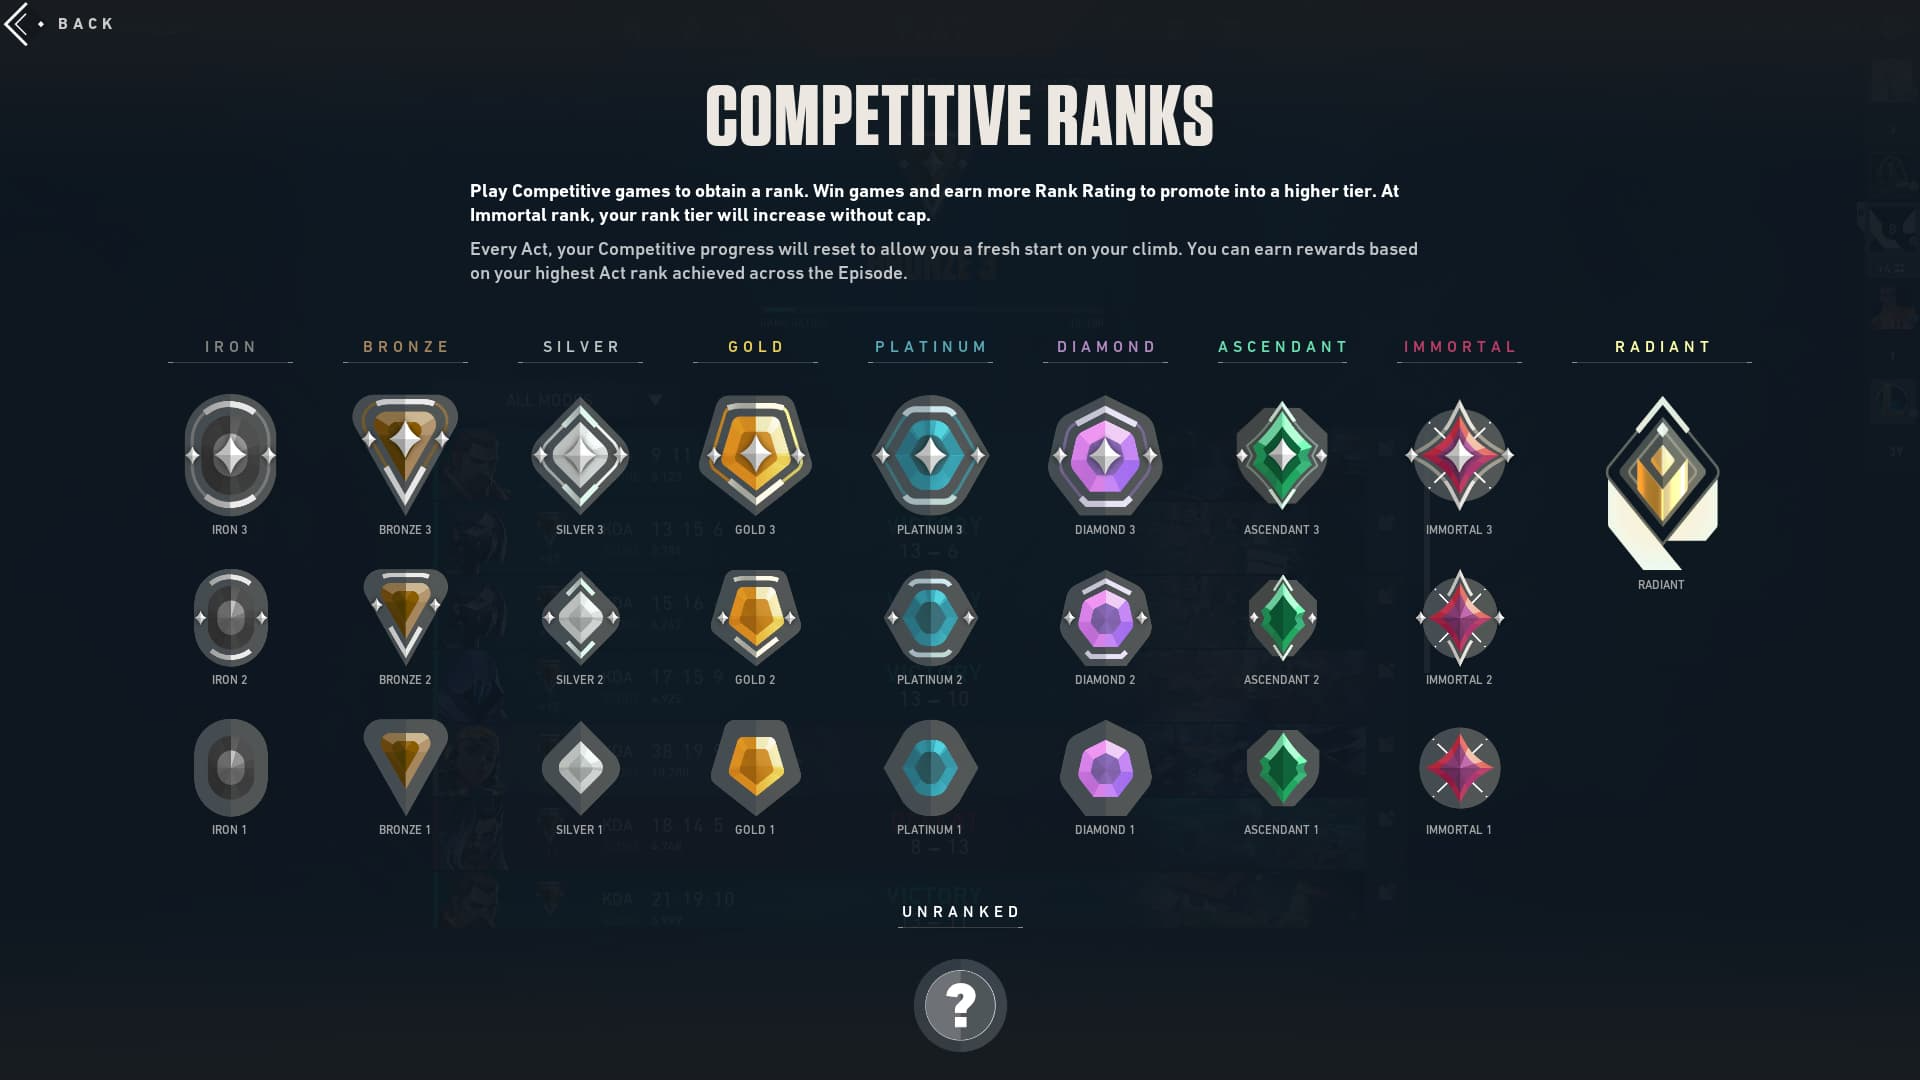

### LINEAR REGRESSION FOR DATASET-1 i.e Players Statistics.csv

Mean Squared Error: 0.18998560382022187
R-squared: 0.9725199394474322


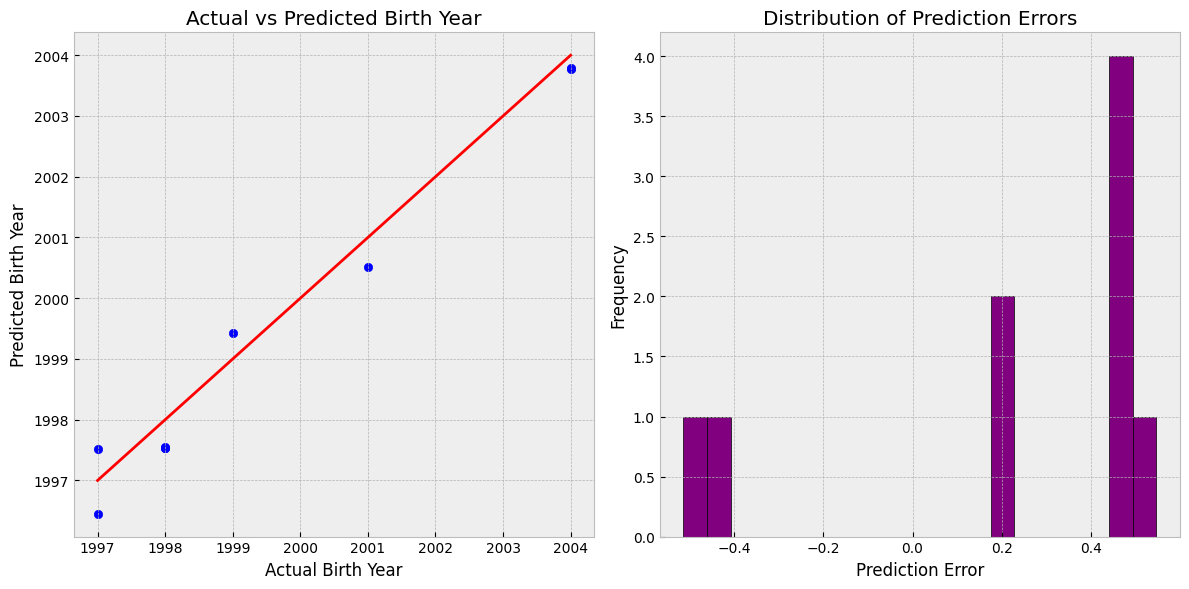

In [38]:
# Ensure the Birth Date is numeric (converted to year)
df['Birth Date'] = pd.to_datetime(df['Birth Date']).dt.year

# Define features (X) and target (y)
X = df[['Age', 'Kills', 'Deaths', 'Assists', 'KillperDeath', 'KDA', 'ACS/Map', 'K/Map', 'D/Map', 'A/Map']]
y = df['Birth Date']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict using the test set
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Birth Year')
plt.ylabel('Predicted Birth Year')
plt.title('Actual vs Predicted Birth Year')

# Plot the error (difference between actual and predicted)
plt.subplot(1, 2, 2)
errors = y_test - y_pred
plt.hist(errors, bins=20, color='purple', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')

# Show both plots
plt.tight_layout()
plt.show()

### LINEAR REGRESSION FOR DATASET-2 i.e FianlStats.csv

In [18]:
val_df = pd.read_csv('FinalStats.csv')
val_df.head()

Elo Gain  ACS  Econ  Enemy Losses  First Bloods  Plants  Defuses  Kills  \
0        31  303    80             9             6       0        0     23   
1        38  367   101             1             4       0        0     18   
2        21  211    54            12             3       0        0     18   
3        19  227    64            11             5       0        1     19   
4        21  218    55             8             2       0        0     18   

   Deaths  Assists  
0      15        7  
1       8        7  
2      18        5  
3      17        5  
4      13        2

Data from model, ELO Gain per Kills

In [19]:
X = val_df['Elo Gain'].values
y = val_df['Kills'].values

Reshaping the ELO Gain Data

In [20]:
# Test Train Split needs data in this format to process
X = X.reshape(-1,1)

Train, Test, Split Data

In [21]:
# We're splitting the data up and grabbing 100 random rows, train 80%, test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)

Plot the scatter points

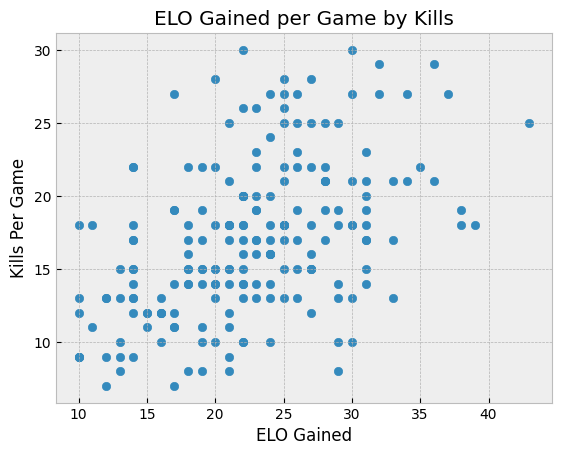

In [22]:
plt.scatter(X_train, y_train)
plt.xlabel('ELO Gained')
plt.ylabel('Kills Per Game')
plt.title('ELO Gained per Game by Kills')
plt.show()

Regression Model Score

In [23]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_predict = lm.predict(X_test)
print(f'Train Accuracy {round(lm.score(X_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(lm.score(X_test, y_test)* 100,2)}%')

Train Accuracy 22.53%
Test Accuracy 27.5%


 Display Trained Model with Linear Regression

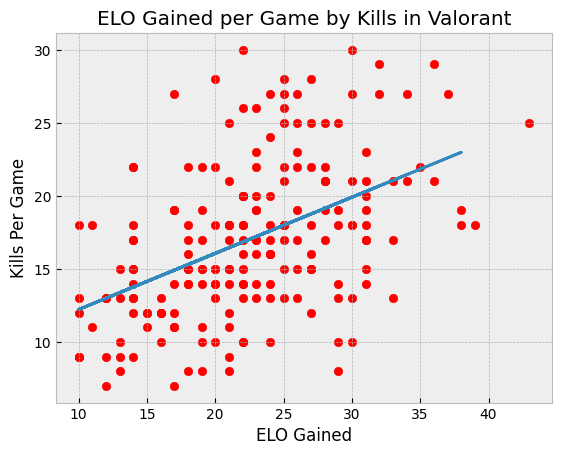

In [24]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_test, y_predict)
plt.xlabel('ELO Gained')
plt.ylabel('Kills Per Game')
plt.title('ELO Gained per Game by Kills in Valorant')
plt.show()


The more kills you get, the more your ELO goes up sometimes

You can get under 20 kills and still receive almost 40 ELO to rank up

Getting kills is not the most important thing to rank up, some other variables may come into consideration such as econ rating, deaths, assists, spikes planted

#  **DECISION TREE FOR BOTH DATASET** 


Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

          46       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       0.0
          68       0.00      0.00      0.00       1.0
          93       0.00      0.00      0.00       0.0
         118       0.00      0.00      0.00       1.0
         162       0.00      0.00      0.00       0.0
         193       0.00      0.00      0.00       0.0
         220       0.00      0.00      0.00       1.0
         249       0.00      0.00      0.00       2.0
         263       0.00      0.00      0.00       1.0
         264       0.00      0.00      0.00       1.0
         268       0.00      0.00      0.00       0.0
         293       0.00      0.00      0.00       1.0

    accuracy                           0.00       9.0
   macro avg       0.00      0.00      0.00       9.0
weighted avg       0.00      0.00      0.00       9.0



c:\Users\TANISHKA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TANISHKA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TANISHKA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

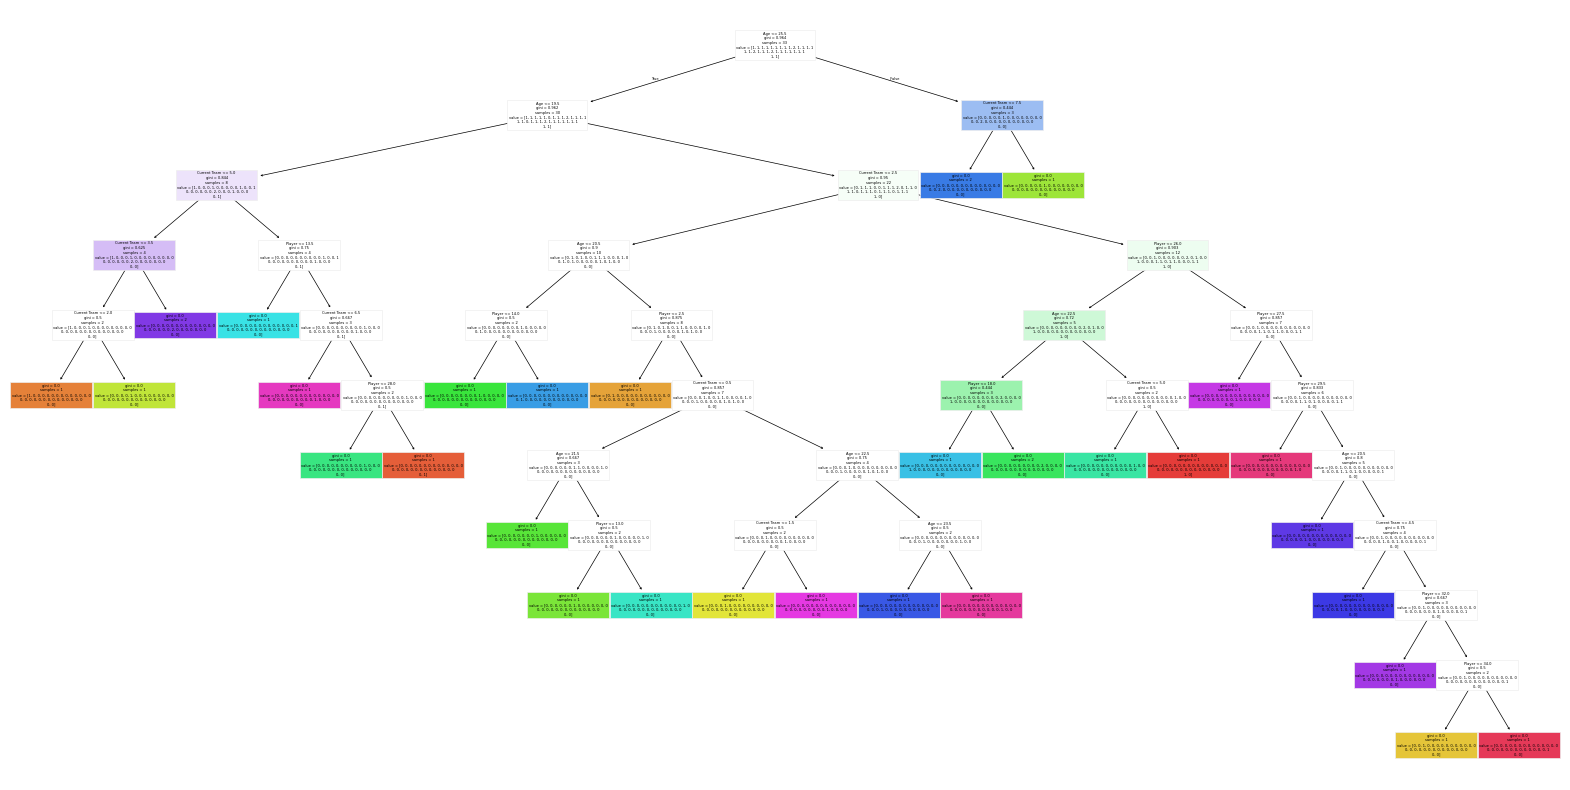

In [25]:
# Convert categorical data to numerical values using Label Encoding
label_encoder = LabelEncoder()
df['Player'] = label_encoder.fit_transform(df['Player'])
df['Current Team'] = label_encoder.fit_transform(df['Current Team'])

# Define features and target
X = df[['Player', 'Age', 'Current Team']]  # Features
y = df['Kills']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, filled=True)
plt.show()


### Decision Tree for Player Statistics (Method 2)

Accuracy: 0.2222222222222222
Classification Report:
               precision    recall  f1-score   support

  1997-03-08       1.00      1.00      1.00         1
  1997-12-02       0.25      1.00      0.40         1
  1998-03-02       0.00      0.00      0.00         1
  1998-03-27       0.00      0.00      0.00         1
  1998-09-21       0.00      0.00      0.00         1
  1999-07-20       0.00      0.00      0.00         1
  2001-05-05       0.00      0.00      0.00         0
  2001-11-09       0.00      0.00      0.00         1
  2002-12-12       0.00      0.00      0.00         0
  2003-07-18       0.00      0.00      0.00         0
  2004-04-19       0.00      0.00      0.00         1
  2004-10-21       0.00      0.00      0.00         1

    accuracy                           0.22         9
   macro avg       0.10      0.17      0.12         9
weighted avg       0.14      0.22      0.16         9



c:\Users\TANISHKA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TANISHKA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TANISHKA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

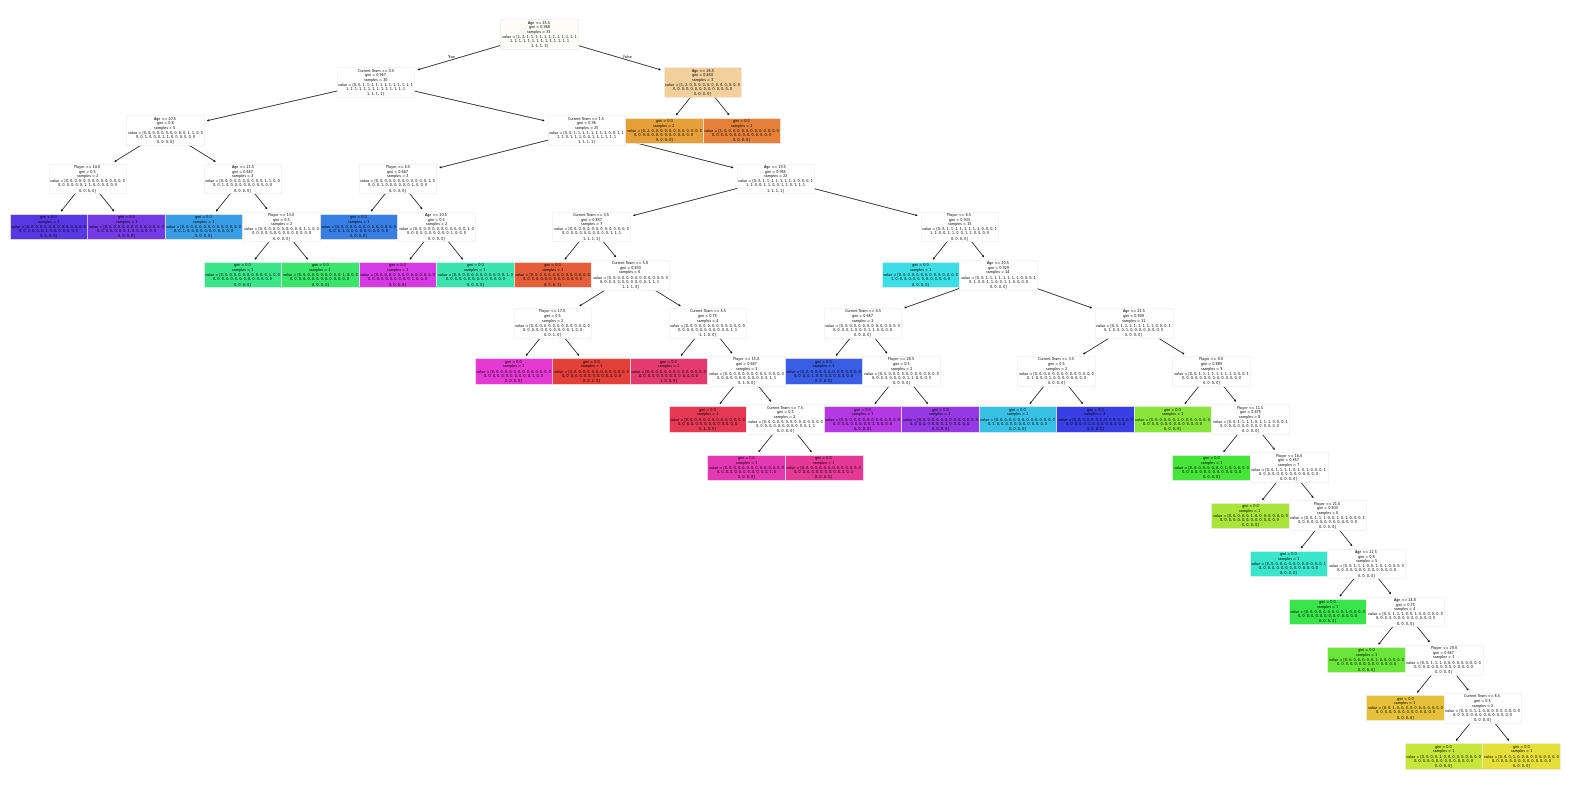

In [26]:
# Convert categorical data to numerical values using Label Encoding
label_encoder = LabelEncoder()
df['Player'] = label_encoder.fit_transform(df['Player'])
df['Current Team'] = label_encoder.fit_transform(df['Current Team'])

# Define features and target
X = df[['Player', 'Age', 'Current Team']]  # Features
y = df['Birth Date']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, filled=True)
plt.show()

### Decision Tree on FinalStats (Type 1)

Accuracy: 0.2549019607843137
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.45      0.47        20
           1       0.19      0.25      0.21        12
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2
           4       0.33      0.25      0.29         4
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.25        51
   macro avg       0.13      0.12      0.12        51
weighted avg       0.27      0.25      0.26        51



c:\Users\TANISHKA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TANISHKA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TANISHKA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

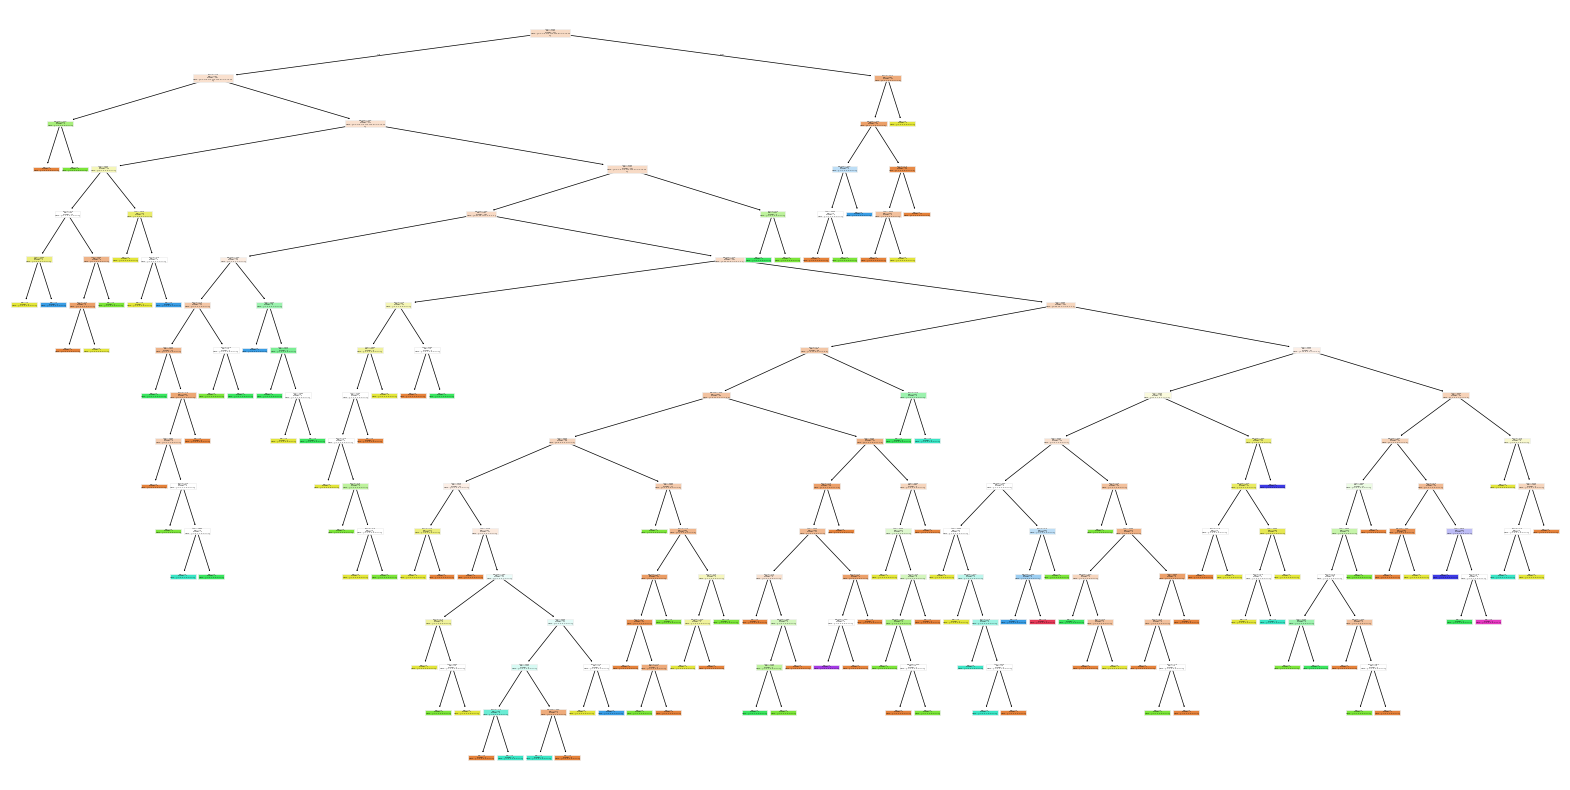

In [27]:
# Assuming 'Elo' and 'Gain' are in the same column, we need to split them
# Example: if 'Elo' and 'Gain' are in one column separated by some delimiter, you can split them
# If 'Elo' and 'Gain' are in separate columns, adjust accordingly
# Example:
# df[['Elo', 'Gain']] = df['YourCombinedColumn'].str.split(',', expand=True)  # Modify as per your data

# Assuming you have columns 'Elo', 'ACS', 'Econ' for features and 'Gain' as the target
# You should adjust this if column names are different or if additional preprocessing is needed

X = val_df[['Elo Gain', 'ACS', 'Econ']]  # Features
y = val_df['Plants']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, filled=True)
plt.show()


### Decision Tree on FinalStats (Type 2)

Accuracy: 0.11764705882352941
Classification Report:
               precision    recall  f1-score   support

           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       0.14      1.00      0.25         1
          13       0.40      0.33      0.36         6
          14       0.00      0.00      0.00         6
          15       0.17      0.14      0.15         7
          16       0.00      0.00      0.00         3
          17       0.20      0.33      0.25         3
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         2
          22       1.00      0.33      0.50         3
          25       0.00    

c:\Users\TANISHKA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TANISHKA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TANISHKA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

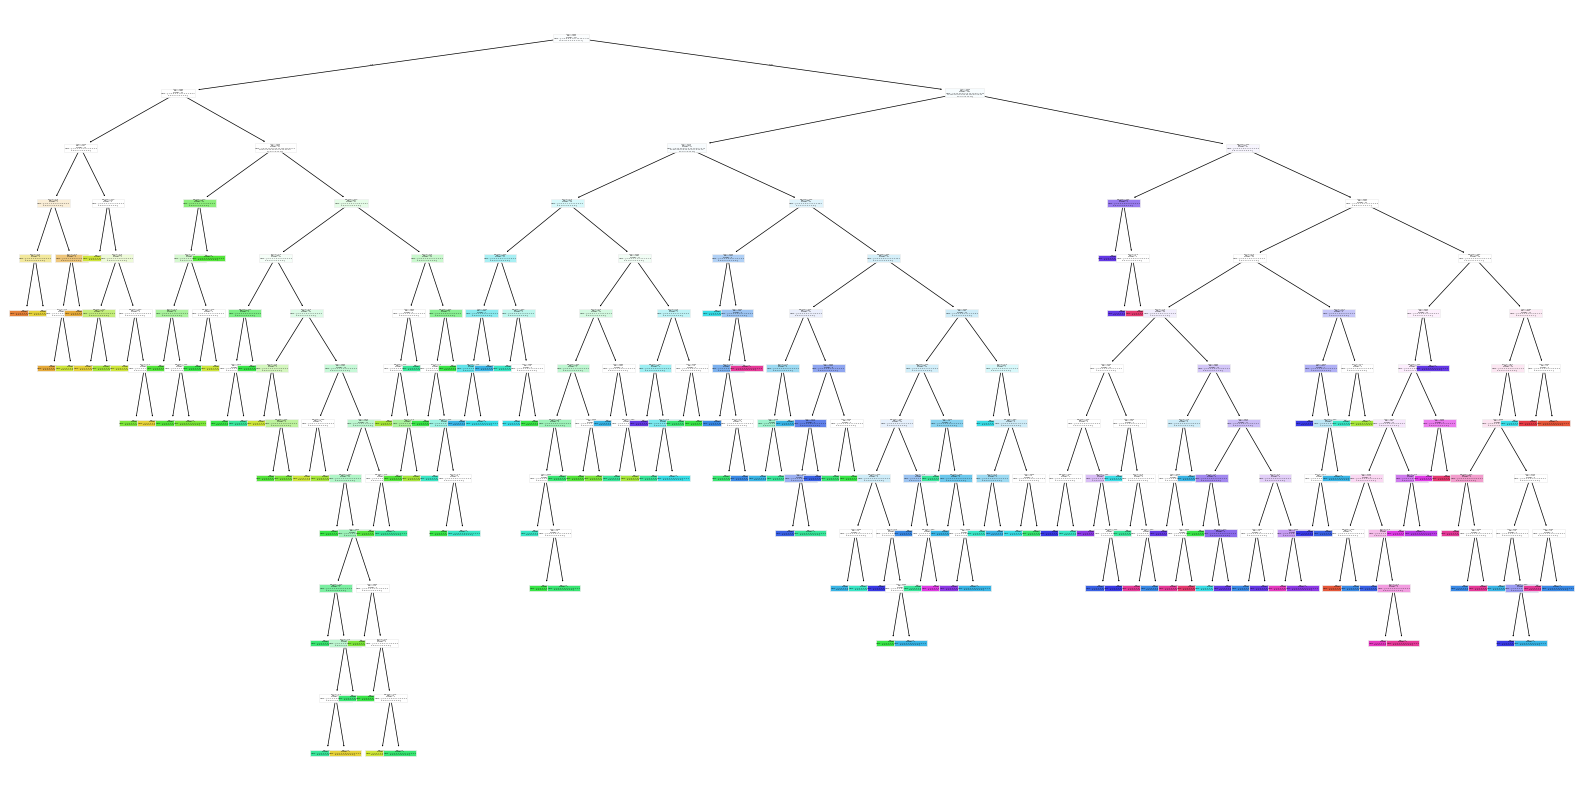

In [28]:

X = val_df[['Elo Gain', 'ACS', 'Econ']]  # Features
y = val_df['Kills']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, filled=True)
plt.show()


### Decision Tree on FinalStats (Type 3)

   Elo Gain  ACS  Econ  Enemy Losses  First Bloods  Plants  Defuses  Kills  \
0        31  303    80             9             6       0        0     23   
1        38  367   101             1             4       0        0     18   
2        21  211    54            12             3       0        0     18   
3        19  227    64            11             5       0        1     19   
4        21  218    55             8             2       0        0     18   

   Deaths  Assists  
0      15        7  
1       8        7  
2      18        5  
3      17        5  
4      13        2  
Accuracy: 0.0392156862745098
Classification Report:
               precision    recall  f1-score   support

           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       0.00    

c:\Users\TANISHKA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TANISHKA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TANISHKA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

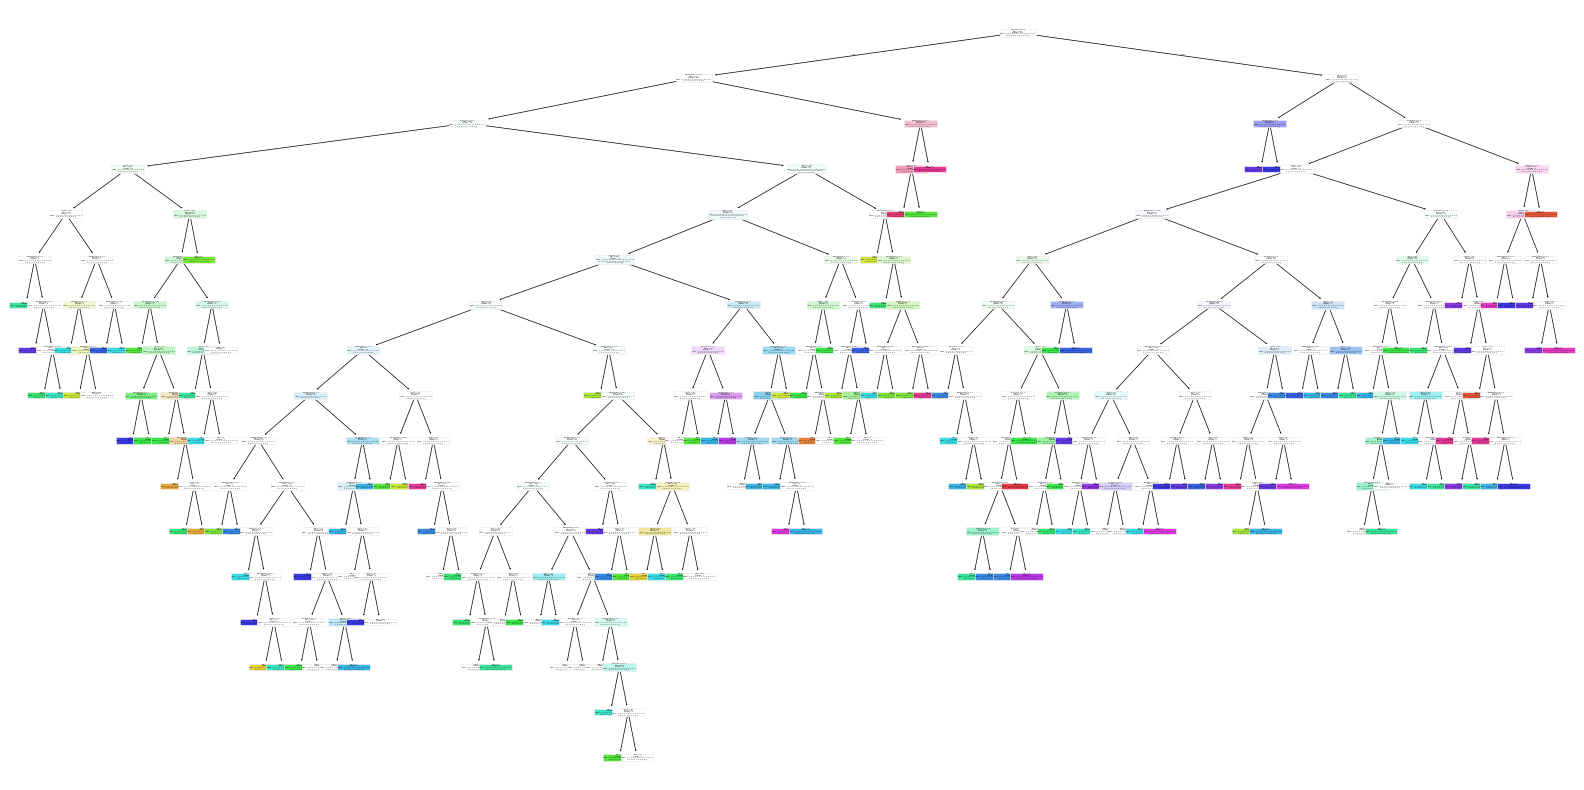

In [29]:
df = pd.read_csv('FinalStats.csv') 
print(df.head())
X = df[['Enemy Losses', 'First Bloods', 'Assists']]  # Features
y = df['Kills']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, filled=True)
plt.show()


# **Project by<br>**
### **Tanishka Das<br>**
### **Shruti Borhade<br>**
### **Anushka Chavan<br>**
### **[GitHub](https://github.com/tanishka786/Valo-player-s-stats-analysis.git)**
